# Weather Analysis using Python requests, APIs, and JSON
### (OpenWeatherMap API)

Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's play around with Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: "Duh. It gets hotter..."

But, if pressed, how would you prove it?I have an answer!!!



<img src="../Images/equatorsign.png">

In [12]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
from datascience import *
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Import logging to log the urls
import logging
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, filename='outputs.log')

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Set seed to freeze the randomly selected latitudes and longitudes
np.random.seed(12345)


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) #Converting latitudes and longitudes into tuples

# Identify nearest city for each lat, lng combination
for lat,lng in lat_lngs:
    city = citipy.nearest_city(lat,lng).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

## Perform API Calls

In [8]:
#OpenWeatherMap API Key
api_key = api_keys.api_key

#Base URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?appid="+api_key+"&units=Imperial"
url

'http://api.openweathermap.org/data/2.5/weather?appid=f461d64ba71ac3ee988c50121e52d70e&units=Imperial'

<b><h3>Objective</h3></b><br> is to build a series of scatter plots to showcase the following relationships:
    
    *  Latitude vs Maximum Temperature(F) 
    *  Latitude vs Humidity(%)
    *  Latitude vs Cloudiness(%) 
    *  Latitude vs Wind Speed(mph) 



* Randomly selects **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Performs a weather check on each of the cities using a series of successive API calls.
* Includes a print log of each city as it's being processed with the city number and city name.



In [9]:
#Initialising the list objects to hold the required Datas
city_name=[]#List to store City names
crd_lat=[]  #List to store Latitudes 
crd_lon=[]  #List to store Longitudes
tem=[]      #List to store Maximun temperatures
Humidity=[] #List to store Humidity
Cloud=[]    #List to store Cloudiness
Wind=[]     #List to store Windspeed
Date=[]     #List to store Dates
Country=[]  #List to store Country Names
log=[]

for city in cities:   #Looping through cities list object to retrive each city to Create the API URL:
    
    response = requests.get(url +"&q="+ city).json()  #Converting URL response into JSON 
    if response['cod']==200:   #COndition checks if the city name is valid 
        logging.info("Processing City number "+str(cities.index(city))+" "+ city+"\n"+url+"&q="+ city)#Logs the resulting URL in a log file
        
        #Collecting datas from the JSON 
        city_name.append(response['name'])
        Date.append(response['dt'])
        Country.append(response['sys']['country'])                          
        crd_lat.append(response['coord']['lat'])
        crd_lon.append(response['coord']['lon'])
        tem.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloud.append(response['clouds']['all'])
        Wind.append(response['wind']['speed'])
   

# Display the City Dataframe

In [23]:
#Converting the collected Data into a DataFrame:
city_df=pd.DataFrame({"City_name":city_name,
                               "Country":Country,
                              "Date":pd.to_datetime(Date,unit='s'),
                              "Latitude":crd_lat,
                              "Longitude":crd_lon,
                                "Maimum Temperature":tem,
                               "Humidity":Humidity,
                               "Cloudiness":Cloud,
                                "Wind Speed":Wind},columns=["City_name","Country","Date","Latitude","Longitude","Maimum Temperature", "Humidity","Cloudiness","Wind Speed"])
city_df.head()

,City_name,Country,Date,Latitude,Longitude,Maimum Temperature,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,CA,2018-07-19 00:00:00,45.36,-73.48,71.60,37,1,6.93
1,Hobart,AU,2018-07-19 00:00:00,-42.88,147.33,53.60,62,40,13.87
2,Hilo,US,2018-07-18 22:56:00,19.71,-155.08,82.40,69,90,12.75
3,Xalpatlahuac,MX,2018-07-19 00:17:14,17.47,-98.62,72.30,64,24,2.71
4,Tezu,IN,2018-07-19 00:17:15,27.93,96.16,71.49,81,8,1.59


In [24]:
max(city_df['Maimum Temperature'])

105.8

In [25]:
city_df[city_df['Maimum Temperature']==105.8]


,City_name,Country,Date,Latitude,Longitude,Maimum Temperature,Humidity,Cloudiness,Wind Speed
482,Clearlake,US,2018-07-18 23:56:00,38.96,-122.63,105.8,6,1,12.75


# Latitude vs Maximum Temperature (F) 

### Trend : Results show that its very hot at the near_by cities of latitudes between 25-45 with a maximum at US city 'Clearlake' 105.8 degree Fahrenheit on Date 2018-07-18 23:56:00

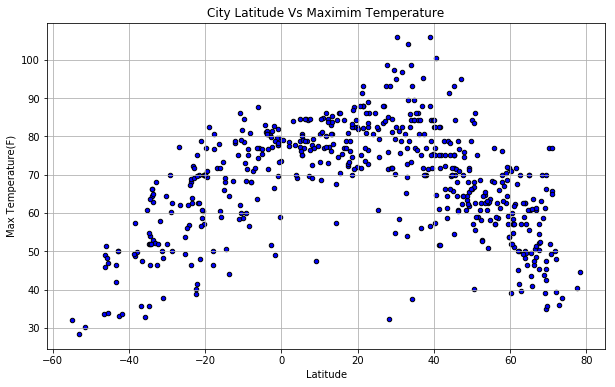

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(crd_lat,tem, marker="o",s=20,edgecolors='black',color='b')
plt.title("City Latitude Vs Maximim Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/TemperatureInWorldCities.png")
# Show plot
plt.show();

# Latitude vs Humidity (%)
### Trend : Results show that  the humididty level is almost 100% all across the places and its hightly unpredictable just with the Latitude information, other factors that affect the humidity level also have to be considered.
### Humdity level is almost at the high percentages around the equator.

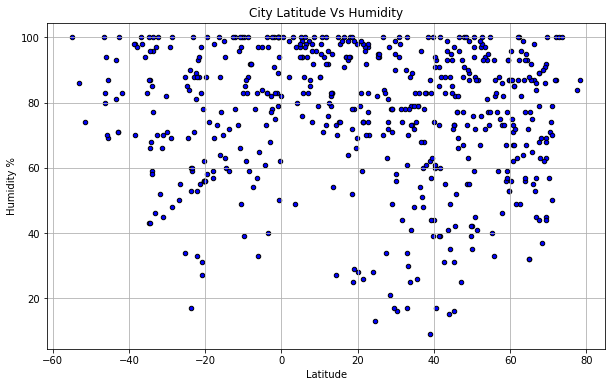

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(crd_lat,Humidity, marker="o",s=20,edgecolors='black',color='b')
plt.title("City Latitude Vs Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../Images/HumidityInWorldCities.png")
# Show plot
plt.show();




# Latitude vs Cloudiness(%)

### Trend : Resulting plot shows that the cloudiness percentage widely varies irrespective of the latitude levels and hence the other associative factors have to be taken care of to predict more of the cloud formation and its density.

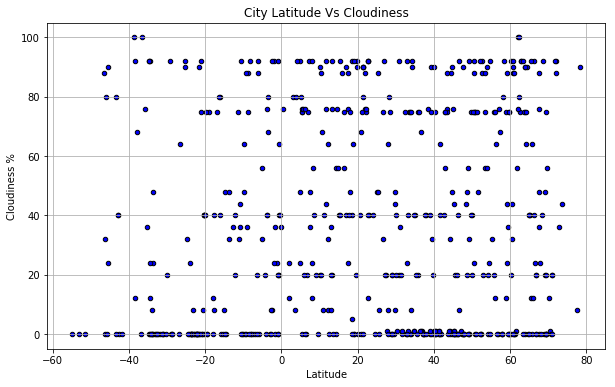

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(crd_lat,Cloud, marker="o",s=20,edgecolors='black',color='b')
plt.title("City Latitude Vs Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../Images/CloudinessInWorldCities.png")
# Show plot)
plt.show();

# Latitude vs Wind Speed(mph)
### Trend : There is no much of insight on the winspeed vs Latitude plot except that the wind speed is low right now all across the places  and at some cities its a bit high and that has no specific correlation with the latitude level.